In [1]:
pip install dfply

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 612 kB 4.8 MB/s 


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os 
import pandas as pd
import numpy as np 
from dfply import *

In [4]:
os.chdir('/content/drive/MyDrive/Colab Notebooks/Data/big_contest')
print(os.getcwd())

/content/drive/MyDrive/Colab Notebooks/Data/big_contest


In [5]:
f_name = sorted(os.listdir())
print(f_name)

['d_test.csv', 'd_train.csv', 'final.csv', 'loan_result.csv', 'log_data.csv', 'p_spec.csv', 'result.csv', 'spec12.csv', 'test.csv', 'train.csv', 'user_spec.csv', '빅콘테스트F.ipynb', '빅콘테스트_데이터F.ipynb']


train 데이터 불러오기

In [6]:
train = pd.read_csv('train.csv')

In [7]:
train.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'application_id', 'year_of_work',
       'age_cate', 'credit_score', 'yearly_income', 'employment_type',
       'income_type', 'houseown_type', 'desired_amount', 'purpose',
       'personal_rehabilitation_yn', 'existing_loan_cnt',
       'loanapply_insert_time', 'bank_id', 'product_id', 'loan_limit',
       'loan_rate', 'is_applied'],
      dtype='object')

train 데이터 정리

In [8]:
train = train.drop(['Unnamed: 0','Unnamed: 0.1'], axis=1)

In [9]:
# 오브젝트 타입의 데이터 추출, 출력
obj = train.select_dtypes(include=['object']).copy()
obj.head(5)

,age_cate,employment_type,income_type,houseown_type,purpose,personal_rehabilitation_yn,loanapply_insert_time
0,20대,계약직,EARNEDINCOME,기타가족소유,BUSINESS,Y,2022-05-21 23:41:10
1,20대,계약직,EARNEDINCOME,기타가족소유,BUSINESS,Y,2022-05-21 23:41:10
2,20대,계약직,EARNEDINCOME,기타가족소유,BUSINESS,Y,2022-05-21 23:41:11
3,20대,계약직,EARNEDINCOME,기타가족소유,BUSINESS,Y,2022-05-21 23:41:09
4,20대,계약직,EARNEDINCOME,기타가족소유,BUSINESS,Y,2022-05-21 23:41:09


In [10]:
# object 변수 중 loanapply_insert_time 제외

train = train.drop(['loanapply_insert_time'], axis=1)

모델 비교

In [11]:
from sklearn.metrics import accuracy_score, f1_score

Xgboost, RandomForest 용 Test, Train 데이터

In [ ]:
# age 데이터 수치화 
df = train 

df['age'] = df['age'].replace('10대', '10')
df['age'] = df['age'].replace('20대', '20')
df['age'] = df['age'].replace('30대', '30')
df['age'] = df['age'].replace('40대', '40')
df['age'] = df['age'].replace('50대', '50')
df['age'] = df['age'].replace('60대', '60')
df['age'] = df['age'].replace('70대', '70')
df['age'] = df['age'].replace('80대', '80')
df['age'] = df['age'].replace('90대', '90')


df['age'] = pd.to_numeric(df['age'])
df['age']

In [46]:
# intercome_type 데이터 수치화 
# 원핫 인코딩 

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import numpy as np

def dummy_data(data,columns):
    for column in columns:
        data = pd.concat([data,pd.get_dummies(data[column],prefix = column)], axis=1)
        data = data.drop(column, axis=1)
    return data

dummy_columns = ['income_type', 'houseown_type', 'purpose','age','employment_type']
df1 = dummy_data(df, dummy_columns)

NameError: ignored

Train:Test = 8:2

In [ ]:
np.random.seed(0)

In [ ]:
from sklearn.model_selection import train_test_split

# X 변수, y변수
target = df1["is_applied"]
data = df1.drop(['is_applied'],axis=1)

# Train:Test = 8:2
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=156)

1. RandomForest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
clf = RandomForestClassifier(n_estimators=100, max_depth=3,random_state=0)
clf.fit(X_train,y_train)

clf.preds = clf.predict(X_test)

In [ ]:
print('정확도:{0:.4f} , F1:{0:.4f}', format(accuracy_score(y_test, clf.preds), f1_score(y_test, clf.preds, average='macro')))

2. XGboost

In [43]:
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance 
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score

In [44]:
xgb = XGBClassifier(n_estimators=100, max_depth=3, random_state=0)

In [ ]:
xgb.fit(X_train, y_train)

xgb.preds = xgb.predict(X_test)

In [ ]:
print('정확도:{0:.4f} , F1:{0:.4f}', format(accuracy_score(y_test, xgb.preds), f1_score(y_test, xgb.preds, average='macro')))

3. LGBM

In [12]:
# object 변수 category화
cat_col = train.columns[train.dtypes == 'object']

for i in range(len(cat_col)):
  train[cat_col[i]] = train[cat_col[i]].astype('category')

In [13]:
np.random.seed(0)

In [15]:
from sklearn.model_selection import train_test_split

# X 변수, y변수
target = train["is_applied"]
data = train.drop(['is_applied'],axis=1)

# Train:Test = 8:2
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=156)

In [16]:
# ligthgbm 라이브러리

import lightgbm

from lightgbm import LGBMClassifier

In [17]:
# LightGBM
lgbm = LGBMClassifier(n_estimators=100, max_depth=3,random_state=0)

evals = [(X_test, y_test)]
lgbm.fit(X_train, y_train)

preds = lgbm.predict(X_test)
pred_proba = lgbm.predict_proba(X_test)[:,1]

In [20]:
print('정확도 : {0:.4f}'.format(accuracy_score(y_test,preds)))

정확도 : 0.9460


In [21]:
print('F1 : {0:.4f}'.format(f1_score(y_test,preds,average='macro')))

F1 : 0.5079


하이퍼파라미터 튜닝

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [300, 400],
    'max_depth': [6, 9],
    'min_samples_split': [0.01, 0.05, 0.1],
    'max_features': ['auto', 'sqrt'],
}

In [ ]:
# estimator
estimator = LGBMClassifier()

In [ ]:
from sklearn.model_selection import KFold

kf = KFold(random_state=30,
           n_splits=10,
           shuffle=True,
          )

In [ ]:
# define grid_search
grid_search = GridSearchCV(estimator=estimator, 
                           param_grid=param_grid, 
                           cv=kf, 
                           n_jobs=-1, 
                           verbose=2
                          )

# fit with (x_train, y_train)
grid_search.fit(X_train, y_train)

최종 학습 모델

In [23]:
lgbm_n = LGBMClassifier(n_estimators=0, num_iterations=400, learning_rate=0.8, reg_alpha=0.9, leg_lambda=0.2)

evals = [(X_test, y_test)]
lgbm_n.fit(X_train, y_train, early_stopping_rounds =100, eval_metric = 'logloss', eval_set=evals, verbose=True)

lgbm_preds = lgbm_n.predict(X_test)
lgbm_pred_proba = lgbm_n.predict_proba(X_test)[:,1]

/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	valid_0's binary_logloss: 0.198398	valid_0's binary_logloss: 0.198398
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's binary_logloss: 0.18274	valid_0's binary_logloss: 0.18274
[3]	valid_0's binary_logloss: 0.194522	valid_0's binary_logloss: 0.194522
[4]	valid_0's binary_logloss: 0.21014	valid_0's binary_logloss: 0.21014
[5]	valid_0's binary_logloss: 0.213645	valid_0's binary_logloss: 0.213645
[6]	valid_0's binary_logloss: 0.213208	valid_0's binary_logloss: 0.213208
[7]	valid_0's binary_logloss: 0.210419	valid_0's binary_logloss: 0.210419
[8]	valid_0's binary_logloss: 0.210751	valid_0's binary_logloss: 0.210751
[9]	valid_0's binary_logloss: 0.208766	valid_0's binary_logloss: 0.208766
[10]	valid_0's binary_logloss: 0.208209	valid_0's binary_logloss: 0.208209
[11]	valid_0's binary_logloss: 0.20663	valid_0's binary_logloss: 0.20663
[12]	valid_0's binary_logloss: 0.206468	valid_0's binary_logloss: 0.206468
[13]	valid_0's binary_logloss: 0.208238	valid_0's bi

In [24]:
print('정확도 : {0:.4f}'.format(accuracy_score(y_test,lgbm_preds)))

정확도 : 0.9424


In [25]:
print('F1 : {0:.4f}'.format(f1_score(y_test,lgbm_preds,average='macro')))

F1 : 0.5328


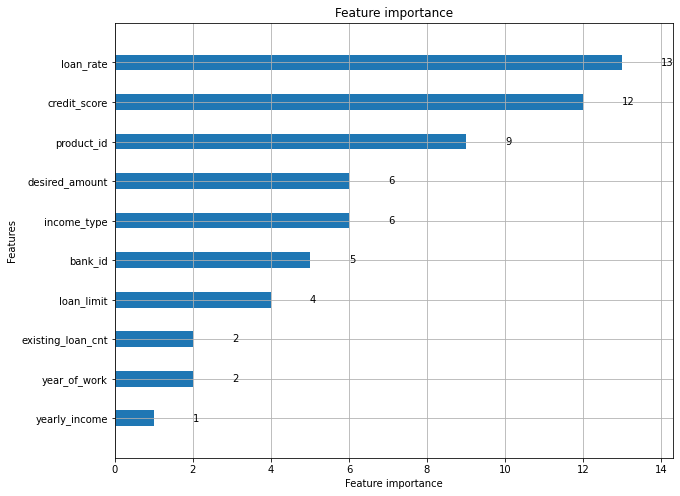

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline
from lightgbm import plot_importance


fig, ax = plt.subplots(1,1, figsize=(10, 8))
plot_importance(lgbm_n, ax=ax, max_num_features=20, height=0.4)


테스트 데이터 불러오기

In [52]:
test = pd.read_csv('test.csv')

테스트 데이터 정리

In [53]:
test['is_applied'] = test['is_applied_x']

In [54]:
# loanapply_insert_time 제외

test = test.drop(['loanapply_insert_time','is_applied_y', 'is_applied_x','Unnamed: 0', 'Unnamed: 0.1'], axis=1)

In [55]:
cat_col = test.columns[test.dtypes == 'object']

for i in range(len(cat_col)):
  test[cat_col[i]] = test[cat_col[i]].astype('category')

In [56]:
test.isna().sum()

application_id                      0
year_of_work                        0
age_cate                            0
credit_score                        0
yearly_income                       0
employment_type                     0
income_type                         0
houseown_type                       0
desired_amount                      0
purpose                             0
personal_rehabilitation_yn          0
existing_loan_cnt                   0
bank_id                             0
product_id                          0
loan_limit                          0
loan_rate                           0
is_applied                    3255194
dtype: int64

In [57]:
test.head(5)

,application_id,year_of_work,age_cate,credit_score,yearly_income,employment_type,income_type,houseown_type,desired_amount,purpose,personal_rehabilitation_yn,existing_loan_cnt,bank_id,product_id,loan_limit,loan_rate,is_applied
0,1521731,2.0,20대,670.0,28000000.0,정규직,EARNEDINCOME,기타가족소유,13000000.0,SWITCHLOAN,Y,1.0,47,138,36000000.0,13.8,NaN
1,1521731,2.0,20대,670.0,28000000.0,정규직,EARNEDINCOME,기타가족소유,13000000.0,SWITCHLOAN,Y,1.0,22,164,16000000.0,8.5,NaN
2,1521731,2.0,20대,670.0,28000000.0,정규직,EARNEDINCOME,기타가족소유,13000000.0,SWITCHLOAN,Y,1.0,17,19,28000000.0,15.9,NaN
3,1521731,2.0,20대,670.0,28000000.0,정규직,EARNEDINCOME,기타가족소유,13000000.0,SWITCHLOAN,Y,1.0,59,251,16000000.0,6.6,NaN
4,1521731,2.0,20대,670.0,28000000.0,정규직,EARNEDINCOME,기타가족소유,13000000.0,SWITCHLOAN,Y,1.0,11,118,5000000.0,17.5,NaN


In [37]:
# X_df

X_df = test.drop(['is_applied'], axis=1)

In [38]:
# 모델 적용 

test['is_applied'] = lgbm_n.predict(X_df)

In [39]:
test.isna().sum()

application_id                0
year_of_work                  0
age_cate                      0
credit_score                  0
yearly_income                 0
employment_type               0
income_type                   0
houseown_type                 0
desired_amount                0
purpose                       0
personal_rehabilitation_yn    0
existing_loan_cnt             0
bank_id                       0
product_id                    0
loan_limit                    0
loan_rate                     0
is_applied                    0
dtype: int64

평가데이터 저장

In [40]:
final = test[['application_id','product_id','is_applied']]

In [41]:
final.head()

,application_id,product_id,is_applied
0,1521731,138,0.0
1,1521731,164,0.0
2,1521731,19,0.0
3,1521731,251,0.0
4,1521731,118,0.0


In [42]:
final.to_csv('final.csv')